Section 1: Import Libraries & Load Data

In [ ]:
# -------------------------------------------
# Section 1: Import Libraries & Load Dataset
# -------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path (update path if needed)
FILEPATH = '/content/Netflix Dataset.xlsx'

# Load the sheet (default is usually 'Sheet1')
df = pd.read_excel(FILEPATH, sheet_name='Sheet1')

# Display shape and first 5 rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (7789, 11)

First 5 Rows:
  Show_Id Category     Title           Director  \
0      s1  TV Show      0.03                NaN   
1      s2    Movie  07:19:00  Jorge Michel Grau   
2      s3    Movie  23:59:00       Gilbert Chan   
3      s4    Movie         9        Shane Acker   
4      s5    Movie        21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

        

Section 2: Data Cleaning & Preprocessing

Here we’ll:

Handle missing values in Director, Cast, Rating, Country.

Convert Release_Date to datetime.

Standardize Ratings into audience categories → Kids / Teens / Adults.

In [ ]:
# -------------------------------------------
# Section 2: Data Cleaning & Preprocessing
# -------------------------------------------

# 1. Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# 2. Handle missing values (fill NAs with "Unknown" where appropriate)
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Unknown")

# 3. Standardize Ratings into Audience Groups
def map_audience(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-G', 'G', 'TV-Y7-FV']:
        return 'Kids'
    elif rating in ['PG', 'TV-PG', 'PG-13', 'TV-14']:
        return 'Teens'
    elif rating in ['R', 'NC-17', 'TV-MA']:
        return 'Adults'
    else:
        return 'Unknown'

df['Audience'] = df['Rating'].apply(map_audience)

# Quick check of cleaned data
print("\nUnique Ratings:", df['Rating'].unique())
print("\nAudience Distribution:")
print(df['Audience'].value_counts())



Unique Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'Unknown' 'TV-Y7'
 'PG' 'G' 'NC-17' 'TV-Y7-FV' 'UR']

Audience Distribution:
Audience
Adults     3533
Teens      3370
Kids        790
Unknown      96
Name: count, dtype: int64


Section 3: EDA — Ratings & Audience Distribution

Here we’ll:

See the overall distribution of ratings.

Compare Audience Groups (Kids / Teens / Adults / Unknown).

Visualize which ratings dominate Netflix’s catalog.

/tmp/ipython-input-1340405795.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette="cubehelix")


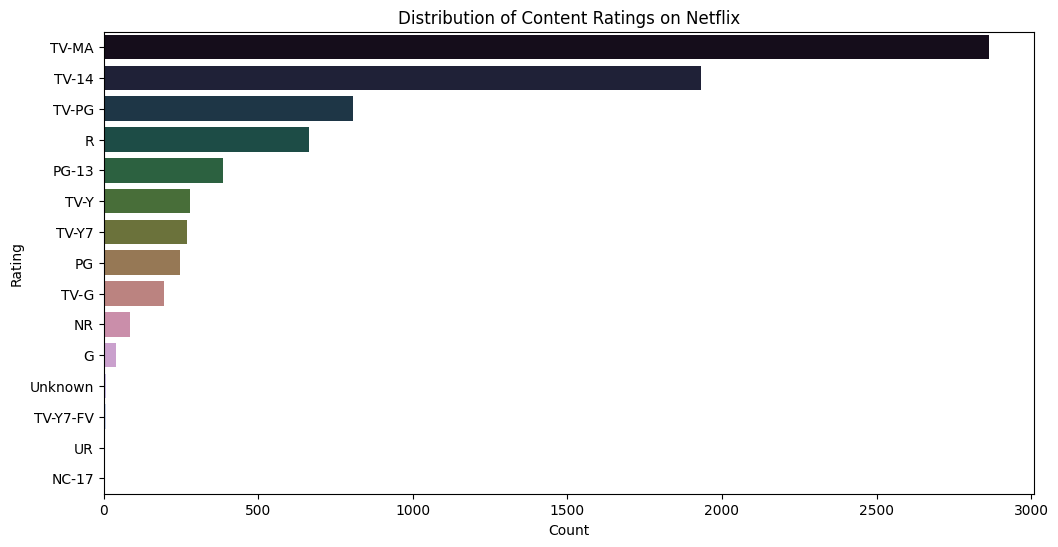

In [ ]:
# -------------------------------------------
# Section 3: Exploratory Data Analysis (EDA) - Ratings
# -------------------------------------------

# 1. Count of each rating
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette="cubehelix")
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

/tmp/ipython-input-3553980954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Audience', order=df['Audience'].value_counts().index, palette="rocket")


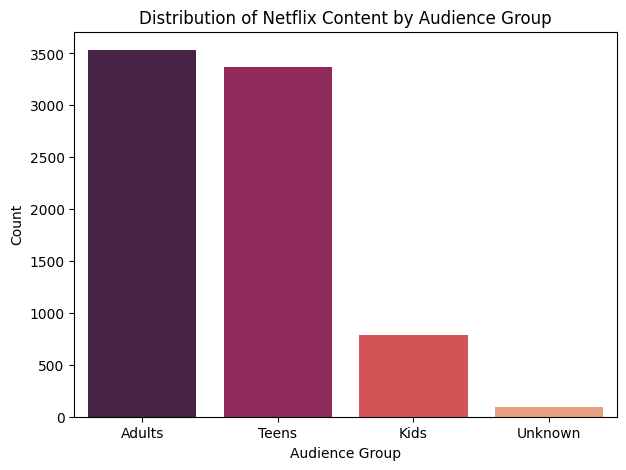


Percentage Breakdown by Audience Group:
 Audience
Adults     45.36
Teens      43.27
Kids       10.14
Unknown     1.23
Name: proportion, dtype: float64


In [ ]:
# 2. Audience Group Distribution (Kids, Teens, Adults, Unknown)
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Audience', order=df['Audience'].value_counts().index, palette="rocket")
plt.title("Distribution of Netflix Content by Audience Group")
plt.xlabel("Audience Group")
plt.ylabel("Count")
plt.show()

# 3. Proportional breakdown
audience_perc = df['Audience'].value_counts(normalize=True) * 100
print("\nPercentage Breakdown by Audience Group:\n", audience_perc.round(2))

Section 4: Movies vs TV Shows — Audience Targeting

Here we’ll:

Compare Audience Groups across Category (Movie / TV Show).

Visualize proportions with bar & stacked charts.

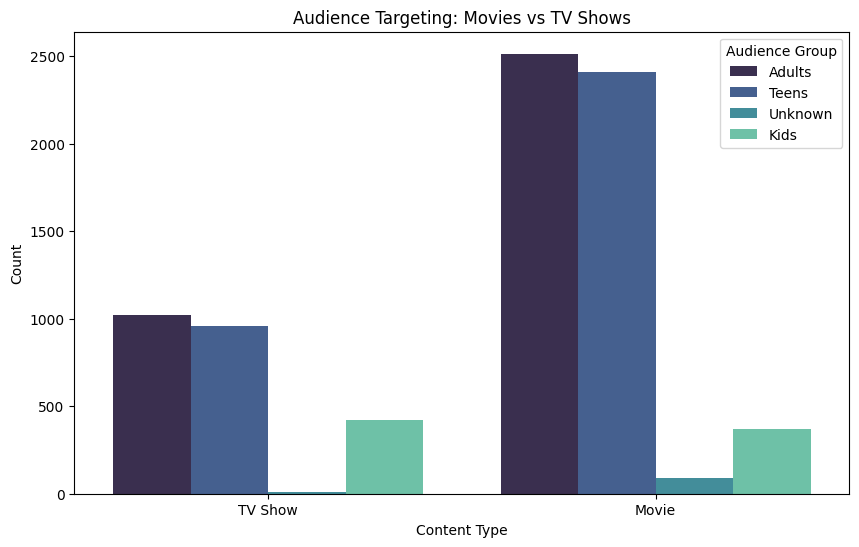

In [ ]:
# -------------------------------------------
# Section 4: Movies vs TV Shows - Audience Targeting
# -------------------------------------------

# 1. Countplot of Audience vs Category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', hue='Audience', palette="mako")
plt.title("Audience Targeting: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.legend(title="Audience Group")
plt.show()

In [ ]:
# 2. Proportional breakdown by category
audience_category = pd.crosstab(df['Category'], df['Audience'], normalize='index') * 100
print("\nProportional Audience Distribution by Category (%):\n", audience_category.round(2))



Proportional Audience Distribution by Category (%):
 Audience  Adults   Kids  Teens  Unknown
Category                               
Movie      46.72   6.82  44.80     1.65
TV Show    42.32  17.55  39.83     0.29


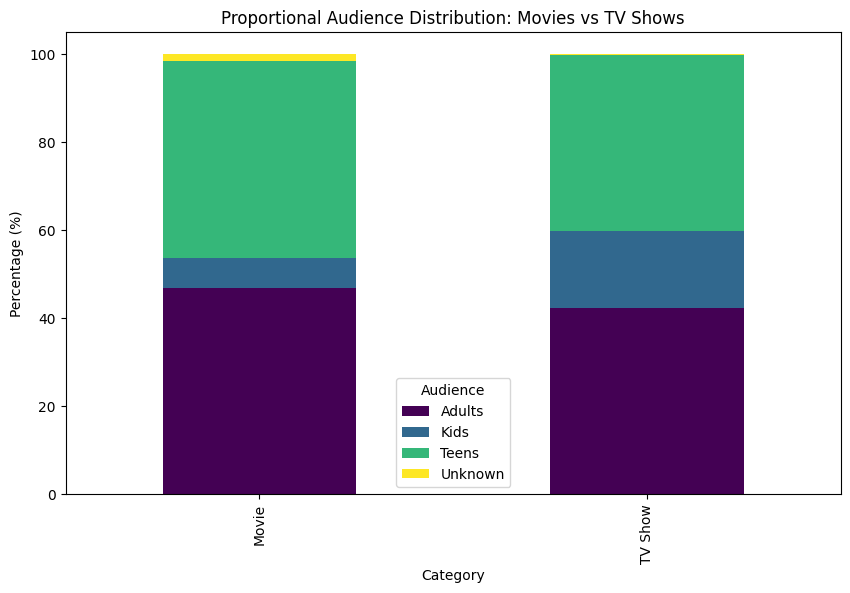

In [ ]:
# 3. Stacked bar chart
audience_category.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Proportional Audience Distribution: Movies vs TV Shows")
plt.ylabel("Percentage (%)")
plt.show()

Section 5: Regional & Year-wise Insights

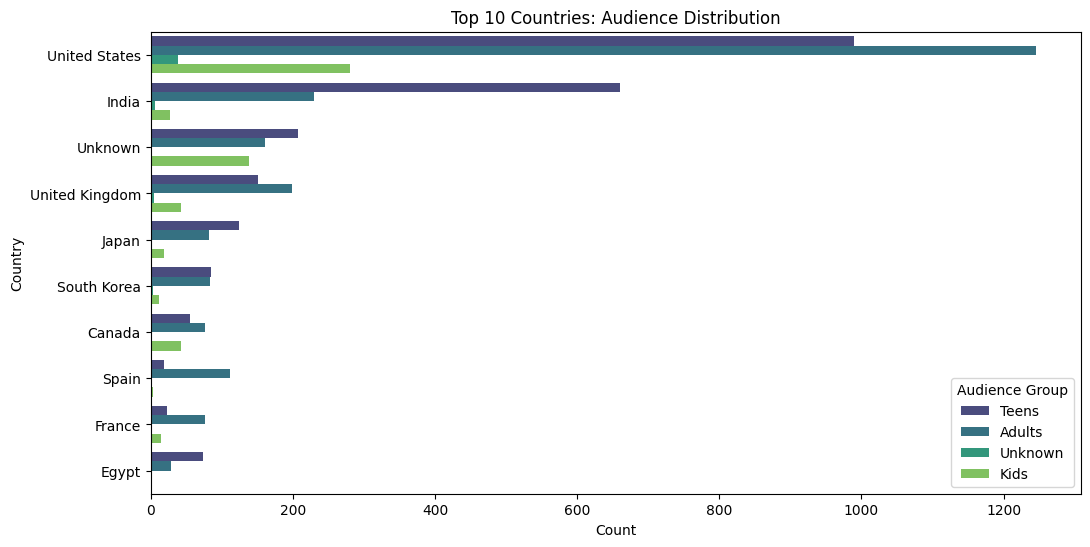

In [ ]:
# 1. Extract Year from Release_Date
df['Year'] = df['Release_Date'].dt.year

# 2. Top 10 Countries by Content Count
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_countries, y='Country', order=top_countries, hue='Audience', palette="viridis")
plt.title("Top 10 Countries: Audience Distribution")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Audience Group")
plt.show()

<Figure size 1400x600 with 0 Axes>

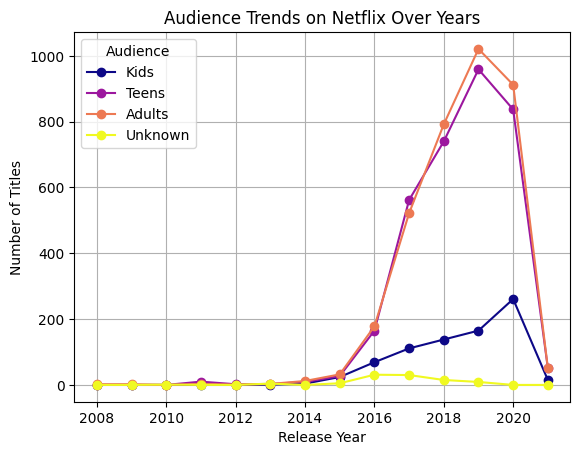

In [ ]:
# 3. Audience Trends Over Years
plt.figure(figsize=(14,6))
audience_year = df.groupby(['Year','Audience']).size().unstack(fill_value=0)
audience_year[['Kids','Teens','Adults','Unknown']].plot(kind='line', marker='o', colormap="plasma")
plt.title("Audience Trends on Netflix Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

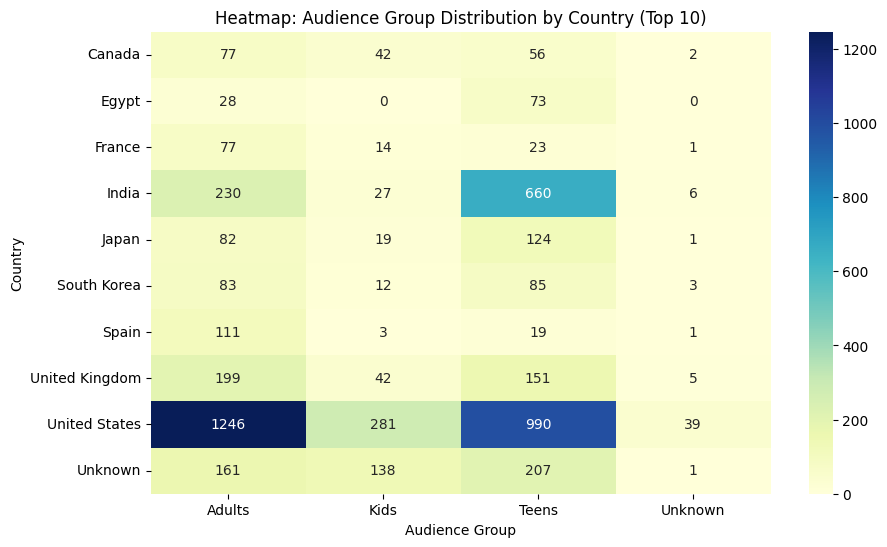

In [ ]:
# 4. Heatmap: Audience vs Top Countries
country_audience = pd.crosstab(df_top_countries['Country'], df_top_countries['Audience'])
plt.figure(figsize=(10,6))
sns.heatmap(country_audience, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Heatmap: Audience Group Distribution by Country (Top 10)")
plt.xlabel("Audience Group")
plt.ylabel("Country")
plt.show()

Section 6: Summary & Conclusion

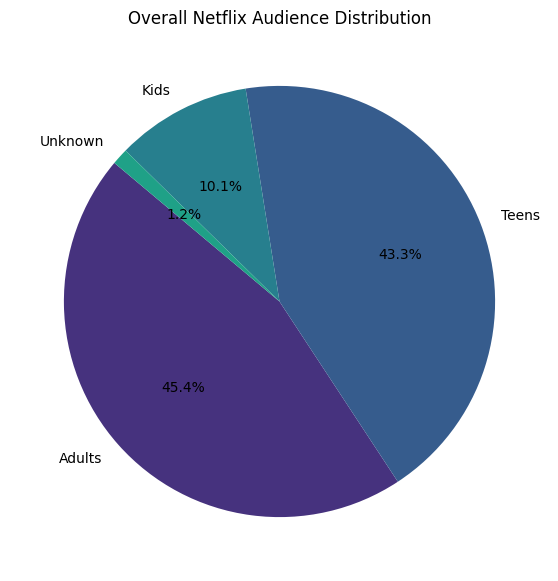

In [30]:
# 1. Overall Audience Distribution Pie Chart
plt.figure(figsize=(7,7))
audience_counts = df['Audience'].value_counts()
plt.pie(audience_counts, labels=audience_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Overall Netflix Audience Distribution")
plt.show()

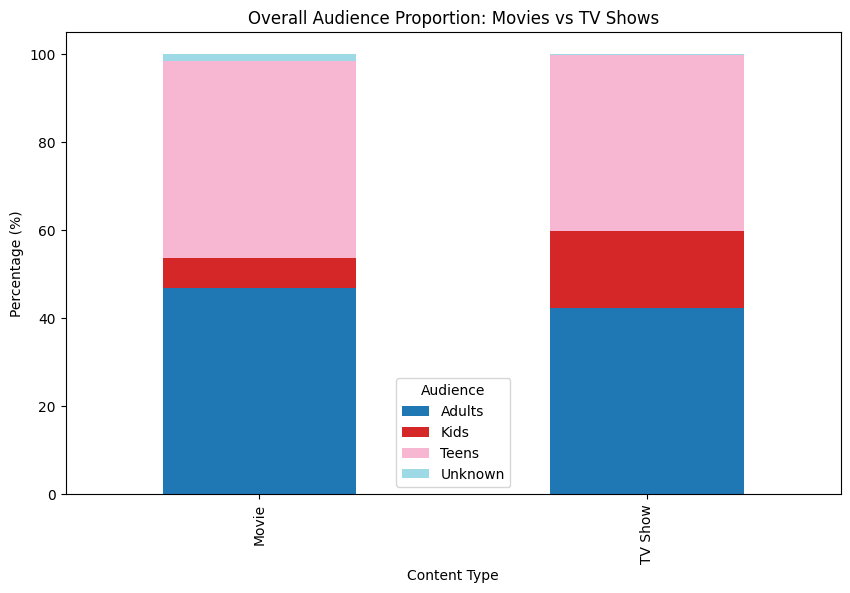

In [ ]:
# 2. Movies vs TV Shows: Overall Audience Proportions
audience_category = pd.crosstab(df['Category'], df['Audience'], normalize='index') * 100
audience_category.plot(kind='bar', stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Overall Audience Proportion: Movies vs TV Shows")
plt.ylabel("Percentage (%)")
plt.xlabel("Content Type")
plt.show()

In [ ]:
# 3. Key Insights Summary
print("----- Key Insights -----")
print("1. Adult-oriented content dominates Netflix's catalog, followed by Teens and then Kids content.")
print("2. Movies tend to have a higher proportion of Adult content compared to TV Shows.")
print("3. TV Shows show a more balanced audience distribution, appealing to Teens and Kids more than Movies.")
print("4. Regional differences exist: some countries (like the US) produce more Adult content, while others focus on family-friendly titles.")
print("5. Over the years, the proportion of Adult content has steadily increased, indicating Netflix's strategic focus on mature audiences.")
print("6. There is a small portion of Unknown ratings, which may require further investigation or cleanup for better accuracy.")

----- Key Insights -----
1. Adult-oriented content dominates Netflix's catalog, followed by Teens and then Kids content.
2. Movies tend to have a higher proportion of Adult content compared to TV Shows.
3. TV Shows show a more balanced audience distribution, appealing to Teens and Kids more than Movies.
4. Regional differences exist: some countries (like the US) produce more Adult content, while others focus on family-friendly titles.
5. Over the years, the proportion of Adult content has steadily increased, indicating Netflix's strategic focus on mature audiences.
6. There is a small portion of Unknown ratings, which may require further investigation or cleanup for better accuracy.
